# 04_1.One Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기(Corab용)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,837 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and dire

In [ ]:
!pip install pingouin

#  *** 세션 다시 시작

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.2 MB/s eta 0:00:00


In [ ]:
# 패키지 미설치시
# pip install numpy pandas matplotlib seaborn scipy pingouin

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg          #통계분석을 위한 패키지
from scipy import stats        #고급통계함수 패키지
import statsmodels.api as sm    #통계 모델링 패키지

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='MalgunGothic')
#plt.rcParams['axes.unicode_minus'] = False # -인식

In [ ]:
# 시스템에 설치된 폰트 확인
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
print(font_list)  # 설치된 폰트 목록 확인

['DejaVu Serif', 'STIXSizeFiveSym', 'DejaVu Serif', 'STIXSizeTwoSym', 'STIXGeneral', 'cmss10', 'STIXGeneral', 'cmb10', 'STIXSizeOneSym', 'STIXSizeTwoSym', 'STIXGeneral', 'STIXSizeFourSym', 'STIXNonUnicode', 'cmtt10', 'cmex10', 'DejaVu Sans Mono', 'DejaVu Sans Display', 'cmmi10', 'STIXGeneral', 'STIXSizeOneSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'cmr10', 'cmsy10', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Serif Display', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Serif', 'DejaVu Sans', 'Liberation Serif', 'Humor Sans', 'Liberation Serif', 'NanumGothic', 'NanumBarunGothic', 'Liberation Sans', 'Liberation Sans', 'Liberation Mono', 'Liberation Mono', 'NanumMyeongjo', 'NanumSquare', 'NanumGothicCoding', 'NanumSquareRound', 'NanumGothicCoding', 'NanumSquareRound', 'NanumGothic', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans Narrow', '

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
ost_df = pd.read_csv('04_1.OST.csv', encoding="cp949")
ost_df.head()

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3
2,304.9,301.0,301.0,307.9,309.9,307.9
3,305.2,304.0,304.0,305.2,310.2,305.2
4,304.0,304.0,304.0,307.0,309.0,307.0


### 2.2 자료구조 살펴보기

In [ ]:
ost_df.shape   #데이터 셋의 행과 열 개수

(102, 6)

In [ ]:
# 데이터의 유형 및 결측치 확인
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   무게1     102 non-null    float64
 1   무게2     102 non-null    float64
 2   무게3     102 non-null    float64
 3   무게4     102 non-null    float64
 4   무게5     102 non-null    float64
 5   무게6     102 non-null    float64
dtypes: float64(6)
memory usage: 4.9 KB


In [ ]:
# 열이름 확인
ost_df.columns

Index(['무게1', '무게2', '무게3', '무게4', '무게5', '무게6'], dtype='object')

## 3.기술통계

In [ ]:
# 수치형 변수
ost_df.describe().round(2).T

#t는 결과를 전치(행과 열 바꾸기 )

,count,mean,std,min,25%,50%,75%,max
무게1,102.0,316.44,12.39,242.0,313.92,317.35,322.50,331.8
무게2,102.0,317.13,12.58,242.0,314.73,318.15,323.30,332.6
무게3,102.0,317.14,12.58,242.0,314.73,318.15,323.30,332.6
무게4,102.0,319.35,12.77,242.0,316.92,320.35,325.50,334.8
무게5,102.0,321.35,12.98,242.0,318.92,322.35,327.50,336.8
무게6,102.0,315.97,12.33,242.0,312.52,317.90,320.68,334.8


In [ ]:
# agg()함수를 사용하에 무게 1에 대한 추가적인 통계량을 계산
ost_df.agg({"무게1": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T \
    .round(2)

#왜도: 분포의 비대칭성, 첨도: 분포의 표족
# 음의 왜도는 분포의 왼쪽 고리가 길다는 의미데이터가 오른쪽에 치우쳐 있다. 즉, 평균이 중앙값보다 왼쪽(작은값)으로 이동하는
#첨도 22.94는 큰값으로 극도로 뾰족하고 꼬리가 두꺼운 분포 중심근처에 데이터가 과도하게 몰려있고 동시에 이상치가 잦게 관측될 수 있음

,count,mean,std,min,max,median,skew,kurtosis
무게1,102.0,316.44,12.39,242.0,331.8,317.35,-4.07,22.94


## 4.t-test

### 4.0 scipy.stats와 비교

In [ ]:
# scipy.stats의 ttest_1samp 함수를 사용하여 단일표본 t-검정 수행
stats.ttest_1samp(ost_df["무게1"], popmean = 320, alternative = "two-sided")

# 검정할 데이터 표본, 비교할 모집단 평균(귀무가설 값), 양측검정 수행

TtestResult(statistic=np.float64(-2.899472691059131), pvalue=np.float64(0.004586364436777763), df=np.int64(101))

### 4.1 차이가 있는 경우(two-sided)
 - T: 검정통계량
 - dof: 자유도
 - alternative: 검정 유형(양측/단측)
 - p-val: p-값
 - CI95%: 95% 신뢰구간
 - cohen-d: 효과크기(Cohen's d)  : 두집단간 평균 차이를 표준편차로 환산 0.2:작은 효과 / 0.5: 중간 정도 효과 / 0.8: 큰 효과
 - BF10: 베이즈 팩터 : 대립가설이 귀무가설보다 데이터를 얼마나 잘 설명하는지 비율로 나타낸

 1 < BF10 < 3: 약한 증거(약간 H₁ 우세)
3  ≤ BF10 <10:  중간 정도 증거
10 ≤BF10 <30:  강한 증거
30 이상: 매우강한 증거

 - power: 검정력: 대립가설이 참일 때 귀무가설을 기각할 확률(80% 이상 목표)

In [ ]:
# two-sided(pingouin 패키지 활용 동일한 검정 수행, 더 많은 정보 제공)
pg.ttest(ost_df["무게1"], 320, alternative = "two-sided").round(3)

# 5.정규분포 가정 검정후 다시 분석

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.087,99,two-sided,0.003,"[316.57, 319.25]",0.309,9.318,0.864


### 4.2 양측과 단측 검정 비교(less)

In [ ]:
# two-sided(양측검정) : 표본 평균이 모집단 평균과 다른지 검정
pg.ttest(ost_df["무게2"], 320, alternative = "two-sided").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.9925,99,two-sided,0.0491,"[317.22, 319.99]",0.1992,0.737,0.5053


In [ ]:
# less (단측검정): 표본 평균이 모집단 평균보다 작은지 검정
pg.ttest(ost_df["무게2"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.992,99,less,0.025,"[-inf, 319.77]",0.199,1.473,0.631


In [ ]:
# two-sided
pg.ttest(ost_df["무게3"], 320, alternative = "two-sided").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.9827,99,two-sided,0.0502,"[317.24, 320.0]",0.1983,0.723,0.5014


In [ ]:
# less
pg.ttest(ost_df["무게3"], 320, alternative = "less").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.983,99,less,0.025,"[-inf, 319.78]",0.198,1.447,0.627


### 4.3 차이가 없는 경우

In [ ]:
# two-sided
pg.ttest(ost_df["무게4"], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.286,99,two-sided,0.202,"[319.52, 322.24]",0.129,0.246,0.247


In [ ]:
# greater
pg.ttest(ost_df["무게4"], 320, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.286,99,greater,0.101,"[319.74, inf]",0.129,0.492,0.356


### 4.4 차이가 있는 경우(greater)

In [ ]:
# two-sided
pg.ttest(ost_df["무게5"], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.295,99,two-sided,0.0,"[321.57, 324.25]",0.429,422.533,0.989


In [ ]:
# greater
pg.ttest(ost_df["무게5"], 320, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.295,99,greater,0.0,"[321.78, inf]",0.429,845.067,0.996


## 5.정규성 검정

### 5.1 정규성 검정
 - Shapiro-Wilk 검정을 사용하여 데이터의 정규성을 검정
 - False면 귀무가설 기각 (귀무가설은 정규분포를 따른다) -> 비모수적 방법 고려해야 함

In [ ]:
pg.normality(ost_df["무게1"])

,W,pval,normal
무게1,0.633649,1.388958e-14,False


In [ ]:
pg.normality(ost_df).T.round(3)

,무게1,무게2,무게3,무게4,무게5,무게6
W,0.633649,0.640934,0.639918,0.620722,0.605953,0.631473
pval,0.0,0.0,0.0,0.0,0.0,0.0
normal,False,False,False,False,False,False


### 5.2 이상치제거

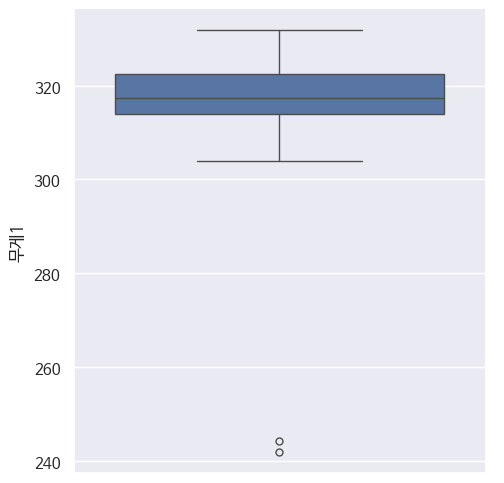

In [ ]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "무게1",
            kind = "box")
plt.show()

In [ ]:
# 이상치 식별 및 제거
filter = (ost_df["무게1"] <= 250)
ost_df.loc[filter]  # 이상치 확인

,무게1,무게2,무게3,무게4,무게5,무게6
0,242.0,242.0,242.0,242.0,242.0,242.0
1,244.3,244.3,244.3,244.3,244.3,244.3


In [ ]:
ost_df.drop(ost_df[filter].index, inplace = True)

In [ ]:
# 이상치 제거 후의 평균
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
무게1,100.0,317.91,6.77,304.0,314.38,317.4,322.58,331.8
무게2,100.0,318.61,6.98,301.0,315.18,318.2,323.38,332.6
무게3,100.0,318.62,6.97,301.0,315.18,318.2,323.38,332.6
무게4,100.0,320.88,6.84,305.2,317.38,320.4,325.58,334.8
무게5,100.0,322.91,6.77,309.0,319.38,322.4,327.58,336.8
무게6,100.0,317.43,6.76,305.2,312.90,317.9,320.75,334.8


In [ ]:
pg.normality(ost_df).T.round(3)

# 4.1로 다시 분석

,무게1,무게2,무게3,무게4,무게5,무게6
W,0.981564,0.985788,0.985853,0.984865,0.981564,0.964417
pval,0.175662,0.3614,0.365202,0.310534,0.175662,0.008408
normal,True,True,True,True,True,False


### 5.3 비모수 통계

In [ ]:
# 비모수통계(Wilcoxon 부호순위 검정)
pg.wilcoxon(ost_df["무게6"] - 320, alternative = "two-sided").round(3)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,1377.0,two-sided,0.0,-0.444,NaN


In [ ]:
# 모수통계 결과와 비교
pg.ttest(ost_df["무게6"], 320, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.805,99,two-sided,0.0,"[316.08, 318.77]",0.381,80.297,0.965


## 6.검증결과 그래프
- 검은 선: 모집단 평균(귀무가설의 평균)
- 파란 선: 95%신뢰구간
- 빨간 선: 표본 평균을 표시 (실제 데이터 평균)
- 표본 평균이 모집단 평균에서 얼마나 벗어났는지, 그리고 그 차이가 통계적으로 유의한지 시각적으로 판단할 수 있습니다.

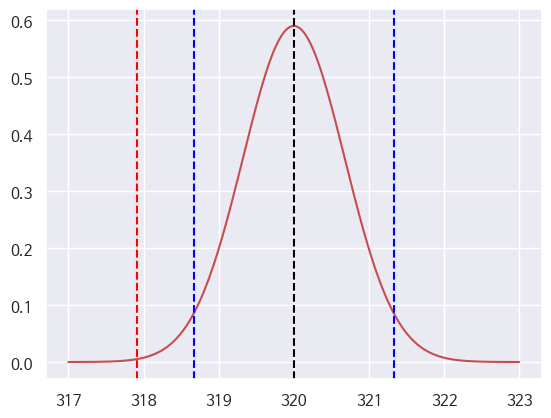

In [ ]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(317, 323, 200)

mu = 320   # 모집단 평균
x = 317.91 # 표본평균
se = 6.77/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = se), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = mu - 1.96 * se, color='blue', linestyle='--')
plt.axvline(x = mu + 1.96 * se, color='blue', linestyle='--')
plt.axvline(x = x, color='red', linestyle='--')
plt.show()

## 7.단일모집단 비율검정(proportion)
- 비율검정(proportion test)은 “표본에서 관측된 성공(success)·사건(event)의 비율이, 우리가 설정한 기준(모집단 비율 가정)과 통계적으로 유의하게 다른지”를 검정
- 실제 검사에서 얻은 이탈률 개수(50개)와 전체 이수(500개)를 바탕으로 이 가설을 검증
- p =0.09와 통계적으로 차이가 있는지 판단하는 것이 비율검정의 핵심

In [ ]:
# One Sample T Test of Proportion
from statsmodels.stats.proportion import proportions_ztest

z, p = proportions_ztest(count = 50,  #관심 있는 사건 발생 횟수
                         nobs = 500,   # 전체 관측치 수
                         value = 0.09)   #비교할 모집단 비율(귀무가설 값)
print('z : {}, p : {}'.format(z, p))

z : 0.7453559924999305, p : 0.45605654025025566


In [ ]:
# 이항분포로 검정 n*p < 5 일때
# n: 표본크기 (시행 횟수)
# p: 귀무가설 하에서 기대되는 성공확률
# nXp는 귀무가설에서 예상되는 성공횟수
# n= 500, p=0.09라면 45가 도출

from statsmodels.stats.proportion import binom_test
binom_test(50, 450, 0.09, alternative="two-sided")


np.float64(0.11762769673872012)

## 8.동등성(Equivalence test)
- 차이가 없다는 것을 증명
- 전통적 검정: 차이가 있는지 검정(귀무가설: 차이 없음)
- 동등성 검정: 차이가 사전에 정의된 범위 내에 있는지 검정(귀무가설: 차이가 범위를 벗어남)

In [ ]:
pg.tost(ost_df["무게1"],
        y = 320,
        bound = 3)  # +-3 범위 설정

# p값이 0.05보다 작으면 두 집단이 동등하다고 결론

,bound,dof,pval
TOST,3,99,0.091325


In [ ]:
pg.tost(ost_df["무게4"],
        y = 320,
        bound = 3)

,bound,dof,pval
TOST,3,99,0.00125


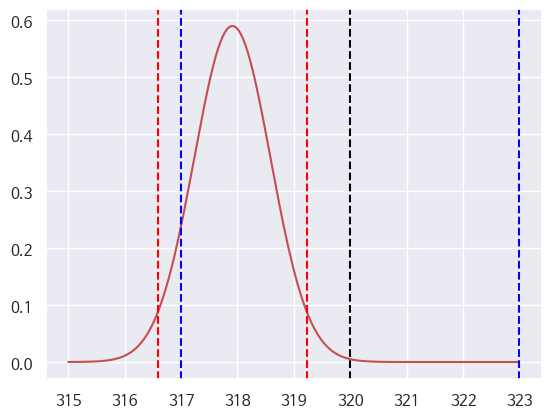

In [ ]:
# 동등성 검정 시각화

from scipy.stats import norm # 정규분포

x_data = np.linspace(315, 323, 200)

mu = 320   # 모집단 평균
eb = 3
x = 317.91 # 표본평균
se = 6.77/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = x, scale = se), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = x - 1.96 * se, color='red', linestyle='--')
plt.axvline(x = x + 1.96 * se, color='red', linestyle='--')
plt.axvline(x = mu - 3, color='blue', linestyle='--')
plt.axvline(x = mu + 3, color='blue', linestyle='--')
plt.show()